<a href="https://colab.research.google.com/github/praaachii4596/MNIST-handwritten-digit-recognition-system/blob/main/MNIST_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Recognition**

Importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import cv2

Loading the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


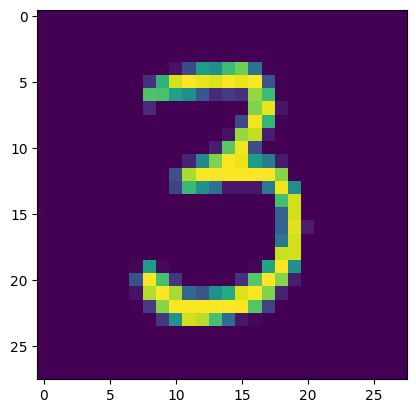

3


In [4]:
plt.imshow(x_train[50])
plt.show()
print(y_train[50])

Normalizing and one-hot encoding the values

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

Building the Neural Network

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the Neural Network

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training the Neural Network

In [8]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8780 - loss: 0.4347 - val_accuracy: 0.9663 - val_loss: 0.1216
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9628 - loss: 0.1261 - val_accuracy: 0.9703 - val_loss: 0.0937
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9754 - loss: 0.0825 - val_accuracy: 0.9758 - val_loss: 0.0770
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9812 - loss: 0.0625 - val_accuracy: 0.9757 - val_loss: 0.0799
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9860 - loss: 0.0459 - val_accuracy: 0.9805 - val_loss: 0.0683
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9890 - loss: 0.0357 - val_accuracy: 0.9743 - val_loss: 0.0909
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9921 - loss: 0.0270 - val_accuracy: 0.9775 - val_loss: 0.0781
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9938 - loss: 0.02

Training data accuracy = 99.57%

In [73]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9753 - loss: 0.0897
0.978600025177002


Test data accuracy = 97.86%

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


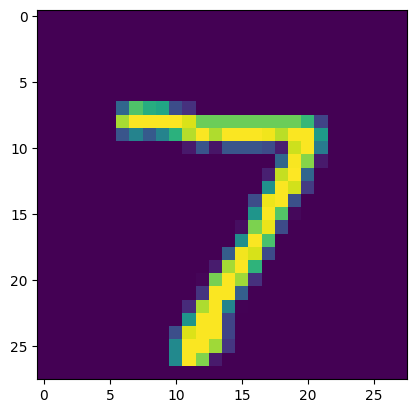

In [14]:
plt.imshow(x_test[0])
print(y_test[0])

Predicting the digits

In [15]:
y_pred = model.predict(x_test)
print (y_pred.shape)
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[1.5610652e-11 1.6654253e-12 1.1048534e-08 6.8689283e-06 2.6564173e-16
 1.8142261e-09 9.8892565e-19 9.9999291e-01 3.4578471e-09 8.1404544e-08]


In [16]:
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [17]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Building a Predictive System

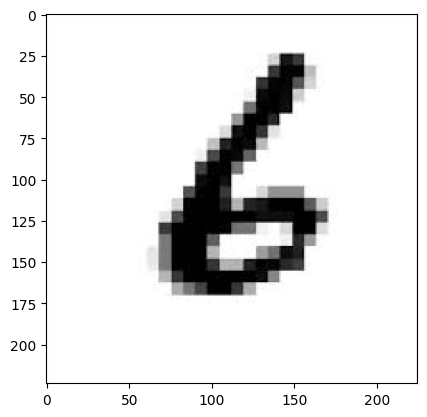

(224, 225, 3)


In [63]:
img = cv2.imread('/content/download.jpg')
plt.imshow(img)
plt.show()
print(img.shape)

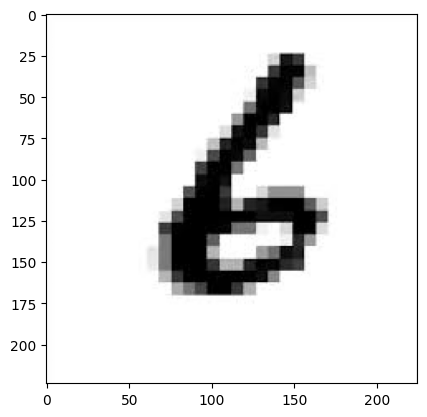

(224, 225)


In [64]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()
print(gray.shape)

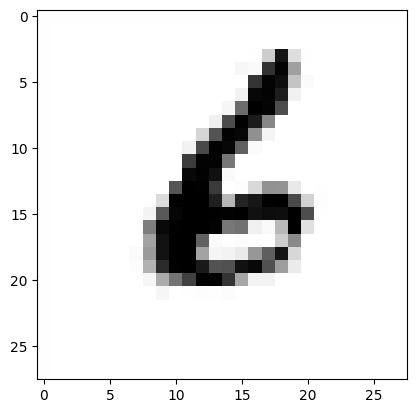

(28, 28)


In [65]:
img_resized = cv2.resize(gray, (28, 28))
plt.imshow(img_resized, cmap='gray')
plt.show()
print(img_resized.shape)

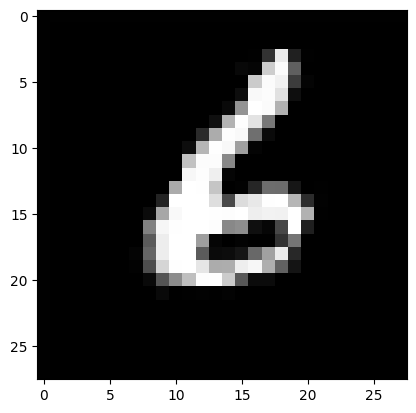

In [66]:
# Invert colors if background is white, digit is black

img_resized = 255 - img_resized
plt.imshow(img_resized, cmap='gray')
plt.show()

In [67]:
img_resized = img_resized/255.0

In [68]:
img_reshaped = np.reshape(img_resized, (1, 28, 28))
print(img_reshaped.shape)

(1, 28, 28)


In [69]:
input_pred = model.predict(img_reshaped)
print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[2.33078799e-06 2.09206902e-07 1.35173250e-05 1.13389715e-08
  3.45864973e-05 1.25206248e-06 9.99947429e-01 5.38610379e-10
  6.61698607e-07 2.12752760e-10]]


In [70]:
input_pred_label = np.argmax(input_pred)
print(input_pred_label)

6


Prediction System

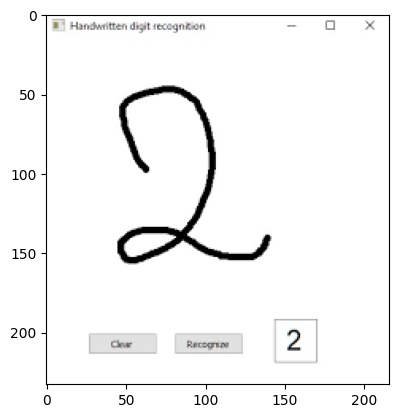

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The model predicted the digit as: 2


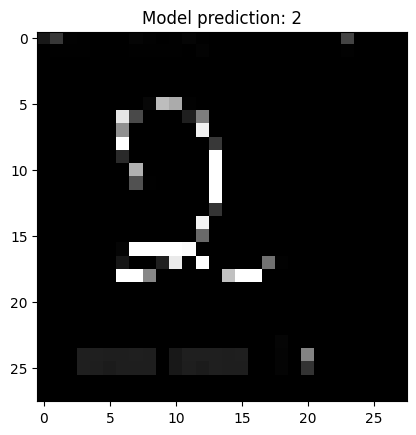

In [72]:
img = cv2.imread('/content/image.png')
plt.imshow(img)
plt.show()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (28, 28))
img_arr = np.array(img)
img_arr = 255 - img_arr
img_arr = img_arr / 255.0
img_arr = np.reshape(img_arr, (1, 28, 28))

pred = model.predict(img_arr)
predicted_digit = np.argmax(pred)
print(f"The model predicted the digit as: {predicted_digit}")
plt.imshow(img_arr.reshape(28, 28), cmap='gray')
plt.title(f'Model prediction: {predicted_digit}')
plt.show()